# Week 2

In [40]:
import urllib.request
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
url1 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv'
url2 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv'
url3 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv'
url4 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv'

### Part 1

In [17]:
data1 = pd.read_csv(url1, delimiter='\t', header=None, names=['x', 'y'])
data2 = pd.read_csv(url2, delimiter='\t', header=None, names=['x', 'y'])
data3 = pd.read_csv(url3, delimiter='\t', header=None, names=['x', 'y'])
data4 = pd.read_csv(url4, delimiter='\t', header=None, names=['x', 'y'])

In [41]:
data2

,x,y
0,10,9.14
1,8,8.14
2,13,8.74
3,9,8.77
4,11,9.26
5,14,8.10
6,6,6.13
7,4,3.10
8,12,9.13
9,7,7.26


In [55]:
data = [data1.sort_values(by=['x']), data2.sort_values(by=['x']), data3.sort_values(by=['x']), data4.sort_values(by=['x'])]
fittedlines = []
for i in range(0, 4):
    meanx = np.mean(data[i]['x'])
    meany = np.mean(data[i]['y'])
    print("{:d}. dataset means: x={:.2f}, y={:.2f}".format(i+1, meanx, meany))
    varx = np.var(data[i]['x'])
    vary = np.var(data[i]['y'])
    print("{:d}. dataset variances: x={:.3f}, y={:.3f}".format(i+1, varx, vary))
    pearson = np.corrcoef(data[i], rowvar=False)
    np.set_printoptions(precision=3)
    print("Pearson correlation coefficient:")
    print(pearson)
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[i]['x'],data[i]['y'])
    print("f(x) = {:.2f}x + {:.2f}".format(slope, intercept))
    fittedlines.append((slope, intercept))
    print('\n')

1. dataset means: x=9.00, y=7.50
1. dataset variances: x=10.000, y=3.752
Pearson correlation coefficient:
[[1.    0.816]
 [0.816 1.   ]]
f(x) = 0.50x + 3.00


2. dataset means: x=9.00, y=7.50
2. dataset variances: x=10.000, y=3.752
Pearson correlation coefficient:
[[1.    0.816]
 [0.816 1.   ]]
f(x) = 0.50x + 3.00


3. dataset means: x=9.00, y=7.50
3. dataset variances: x=10.000, y=3.748
Pearson correlation coefficient:
[[1.    0.816]
 [0.816 1.   ]]
f(x) = 0.50x + 3.00


4. dataset means: x=9.00, y=7.50
4. dataset variances: x=10.000, y=3.748
Pearson correlation coefficient:
[[1.    0.817]
 [0.817 1.   ]]
f(x) = 0.50x + 3.00




From the calculated values, the datasets are extremely similar, with only a slight difference in variance. 

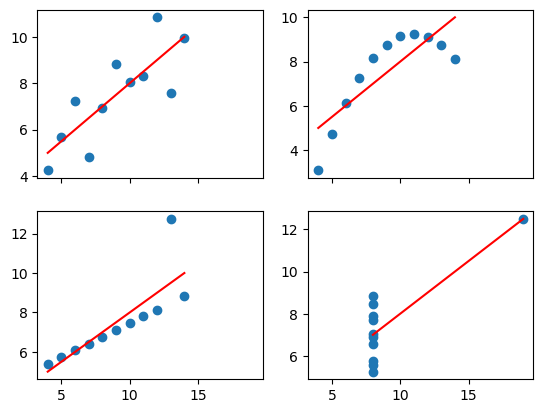

In [57]:
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True)
i = 0
for row in axes:
    for col in row:
        x = data[i]['x']
        col.scatter(x, data[i]['y'])
        y = fittedlines[i][0]*x + fittedlines[i][1]
        col.plot(x, y, color='red')
        i += 1
plt.show()

[(0.5000909090909091, 3.0000909090909076),
 (0.5, 3.00090909090909),
 (0.4997272727272727, 3.0024545454545457),
 (0.4999090909090909, 3.0017272727272726)]